<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum06_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Memanggil data lewat gdrive
path = "/content/gdrive/MyDrive/MATKUL/SEMESTER_SEVEN/MACHINE_LEARNING/PRAKTIKUM/Praktikum06"

In [4]:
# Membaca data file CSV
df = pd.read_csv(path + "/data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Melihat informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Melihat jumlah nilai kosong (missing values)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Melihat statistik deskriptif
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    526
0    499
Name: count, dtype: int64


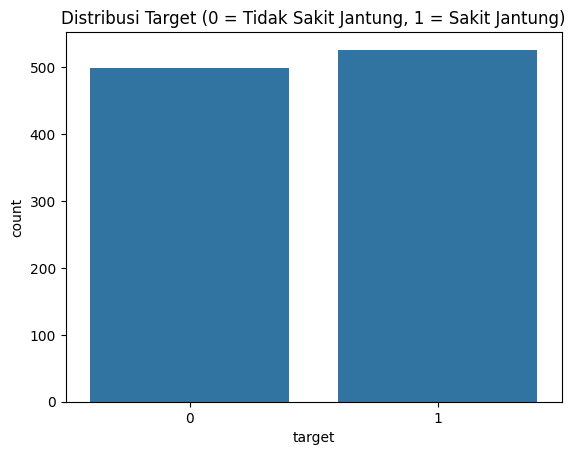

In [8]:
# Lihat Distribusi Target
# Cek kolom target untuk memastikan proporsi kelas seimbang.

# Cek distribusi label target
print(df['target'].value_counts())

# Visualisasi distribusi target
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Distribusi Target (0 = Tidak Sakit Jantung, 1 = Sakit Jantung)")
plt.show()

In [9]:
# Pisahkan Fitur dan Target
# Kita pisahkan fitur (X) dan target (y).

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Split Data Menjadi Training & Testing
# Pisahkan data untuk melatih dan menguji model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Standarisasi Data (Scaling)
# Karena SVM sensitif terhadap skala data, maka perlu menormalkan fitur.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Membuat dan melatih Model SVM
# Membuat model Support Vector Machine dan latih dengan data training.
from sklearn.svm import SVC

# Buat model SVM dengan kernel RBF
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

SVC(C=1)

In [13]:
# Mengevaluasi Model
# Menggunakan data test untuk melihat performa model.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.926829268292683

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


Confusion Matrix:
 [[91  9]
 [ 6 99]]


In [14]:
# Mencoba kernel lain seperti 'linear' atau 'poly' untuk melihat perbandingan hasil.
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("-------------------------------")

Kernel: linear
Akurasi: 0.8146341463414634
-------------------------------
Kernel: rbf
Akurasi: 0.926829268292683
-------------------------------
Kernel: poly
Akurasi: 0.926829268292683
-------------------------------
Kernel: sigmoid
Akurasi: 0.7463414634146341
-------------------------------


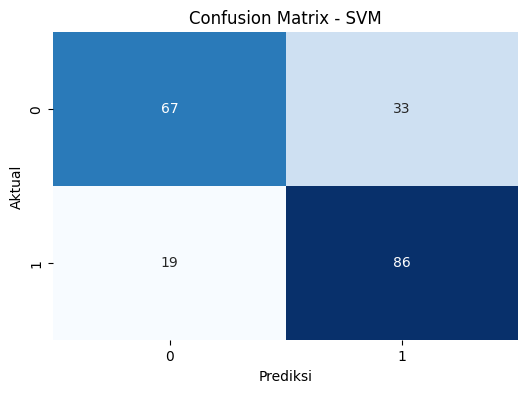

In [15]:
# Visualisasi Hasil Prediksi SVM
# Menunjukkan jumlah prediksi benar dan salah
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - SVM')
plt.show()

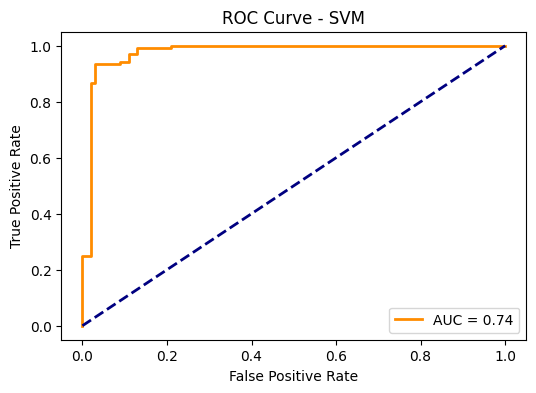

In [16]:
# ROC Curve (Receiver Operating Characteristic Curve)
# Menunjukkan trade-off antara True Positive Rate dan False Positive Rate.
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilitas prediksi
y_prob = svm.decision_function(X_test)  # gunakan .decision_function untuk SVM non-probabilistik

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

/tmp/ipython-input-1947262539.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=accuracies, palette='viridis')


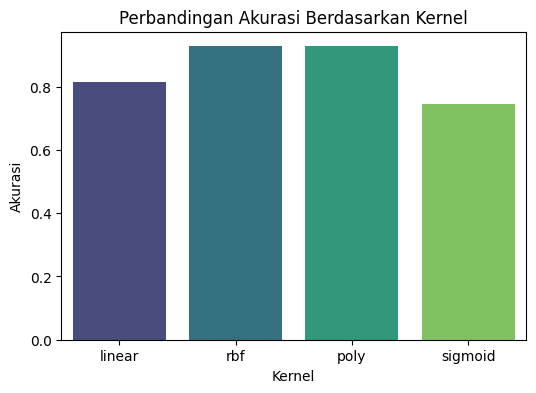

In [17]:
# Perbandingan Akurasi Beberapa Kernel
# Untuk melihat kernel mana yang paling baik pada dataset penyakit jantung.
from sklearn.metrics import accuracy_score

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=1, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Visualisasi akurasi tiap kernel
plt.figure(figsize=(6,4))
sns.barplot(x=kernels, y=accuracies, palette='viridis')
plt.title('Perbandingan Akurasi Berdasarkan Kernel')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.show()